In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.stats.proportion as sp


import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('D:\Bhavesh\Exploratory data analysis/Travel.csv')

In [4]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [5]:
df.shape

(4888, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
df.Gender.unique()


array(['Female', 'Male', 'Fe Male'], dtype=object)

In [8]:
df.replace('Fe Male','Female',inplace=True)

In [9]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [18]:
round(100*(df.isnull().sum()/len(df.index)),2)

CustomerID                  0.00
ProdTaken                   0.00
Age                         4.62
TypeofContact               0.51
CityTier                    0.00
DurationOfPitch             5.14
Occupation                  0.00
Gender                      0.00
NumberOfPersonVisiting      0.00
NumberOfFollowups           0.92
ProductPitched              0.00
PreferredPropertyStar       0.53
MaritalStatus               0.00
NumberOfTrips               2.86
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
NumberOfChildrenVisiting    1.35
Designation                 0.00
MonthlyIncome               4.77
dtype: float64

In [19]:
round(100.1234,2)

100.12

In [15]:
len(df.index)

4888

In [21]:
df.isnull().sum()/len(df.index)

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         0.046236
TypeofContact               0.005115
CityTier                    0.000000
DurationOfPitch             0.051350
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.009206
ProductPitched              0.000000
PreferredPropertyStar       0.005319
MaritalStatus               0.000000
NumberOfTrips               0.028642
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    0.013502
Designation                 0.000000
MonthlyIncome               0.047668
dtype: float64

In [22]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [27]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']

In [24]:
num_col = [col for col  in df.columns if df[col].dtype != 'object']

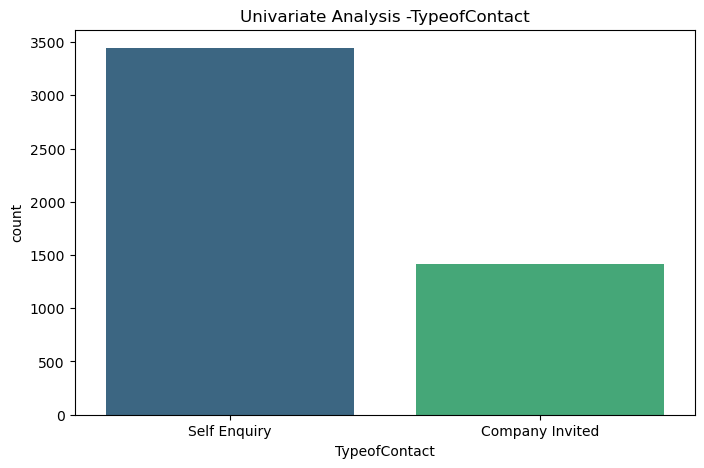

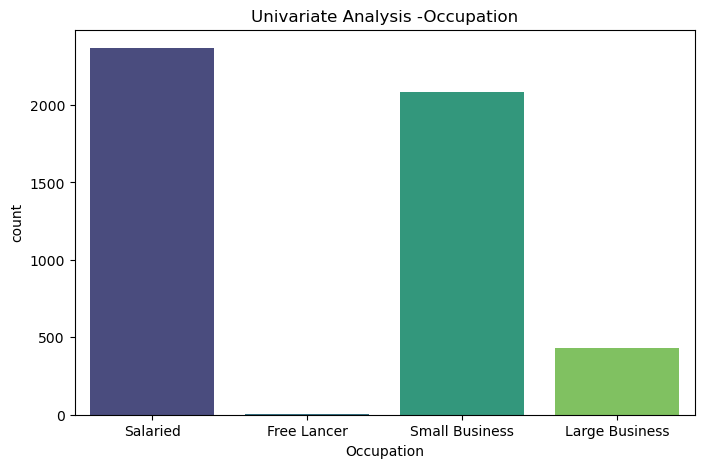

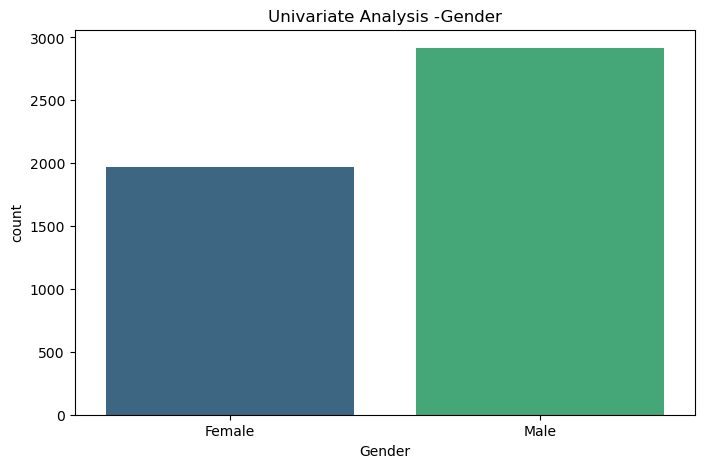

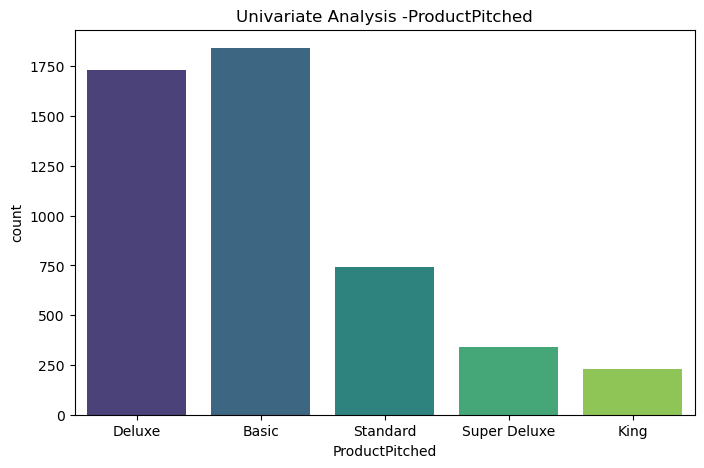

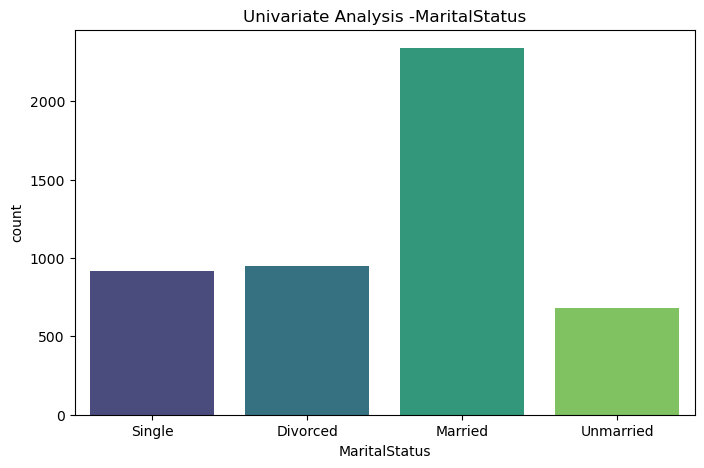

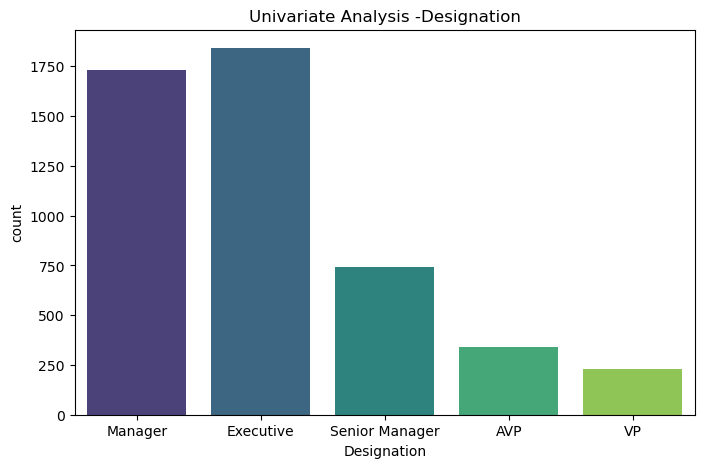

In [29]:
for column in cat_col:
    plt.figure(figsize=(8,5))
    sns.countplot(x=column,data=df,palette='viridis')
    plt.title(f'Univariate Analysis -{column}')
    plt.show()

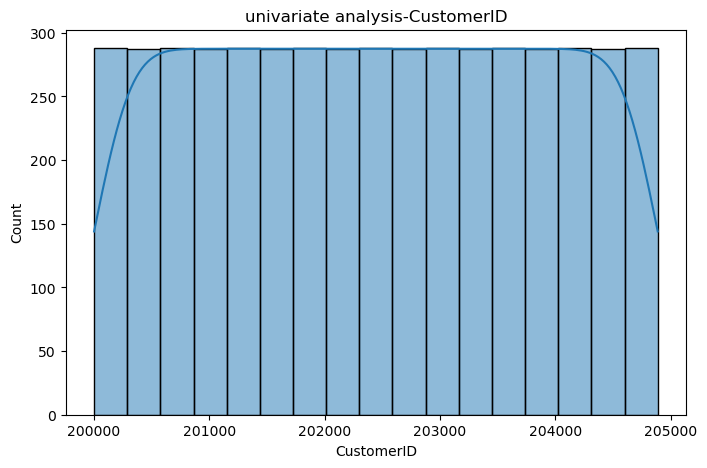

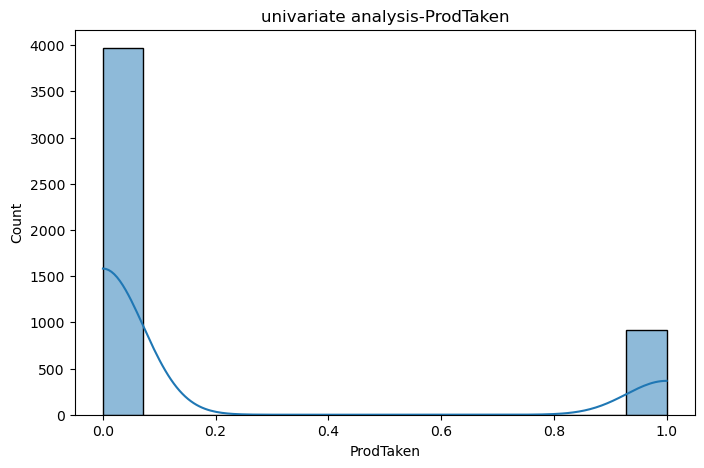

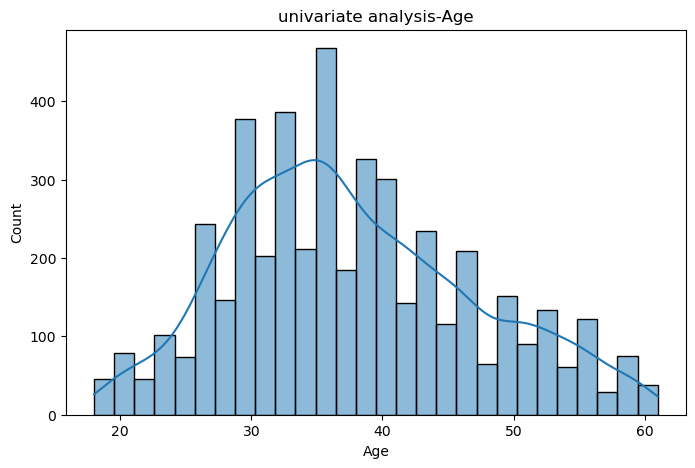

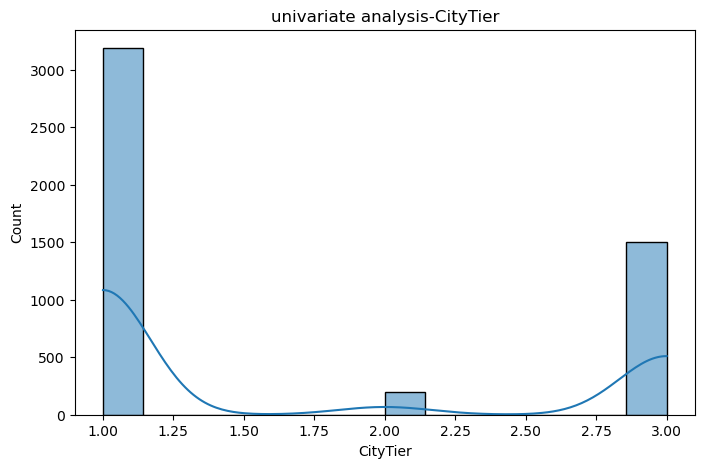

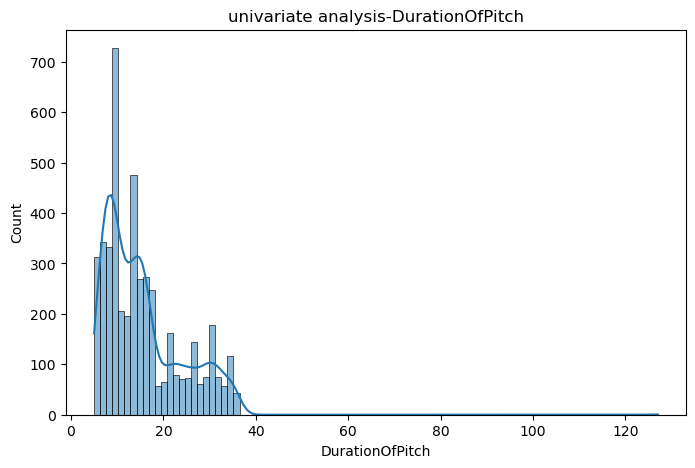

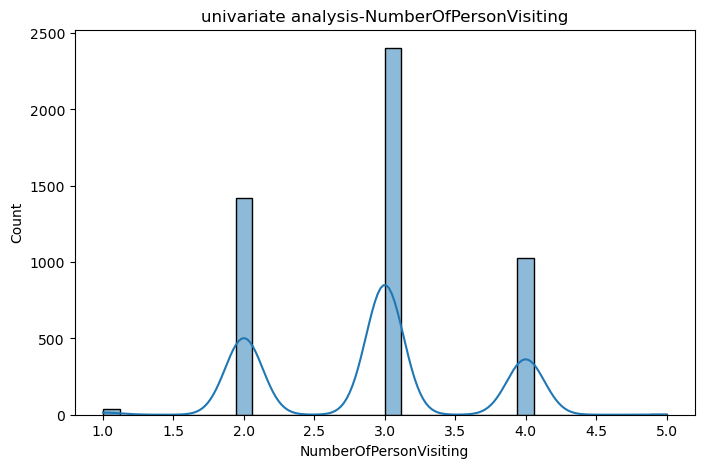

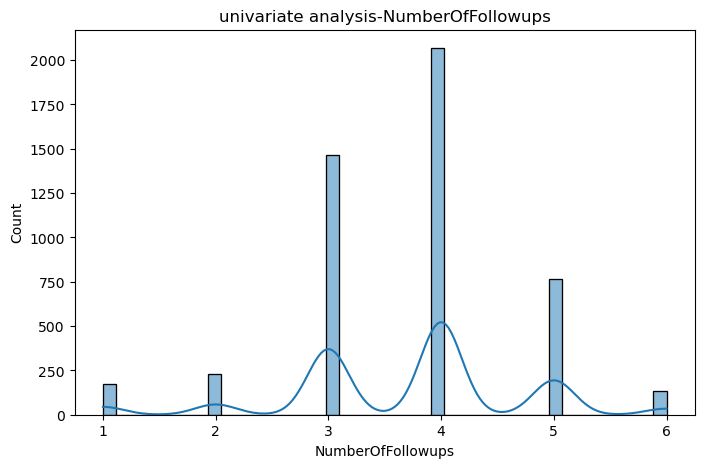

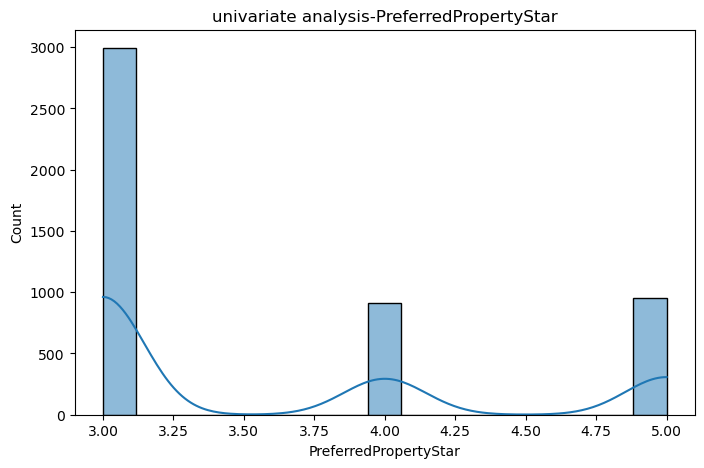

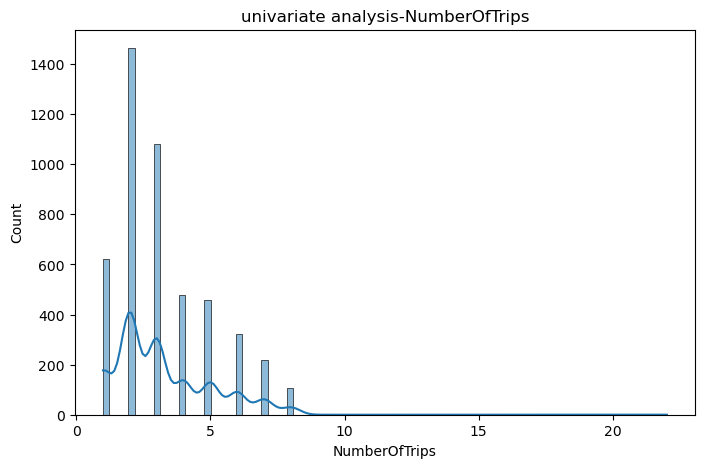

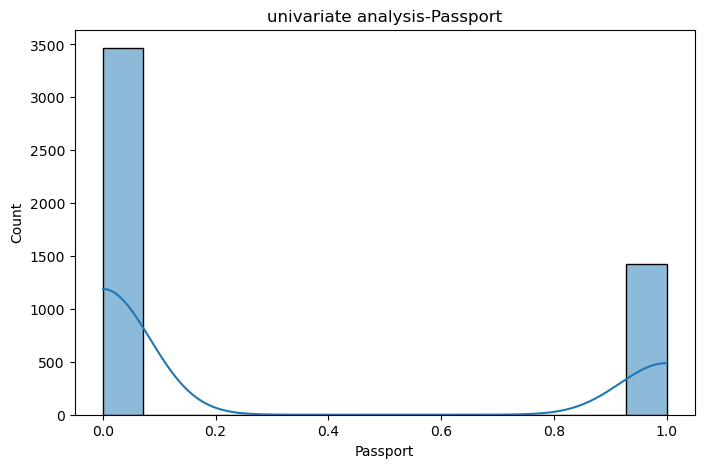

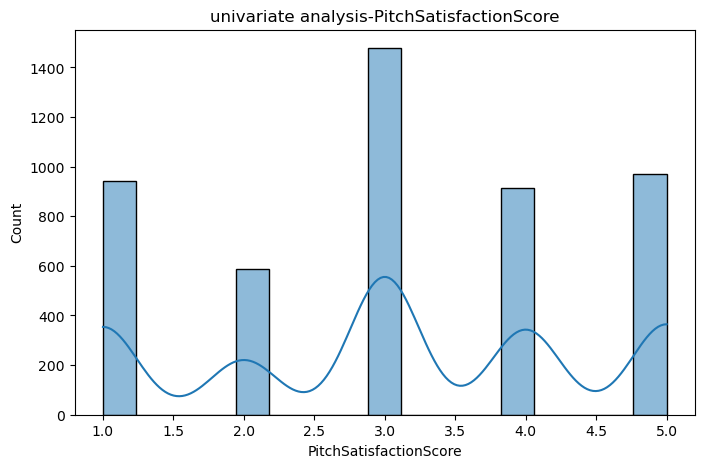

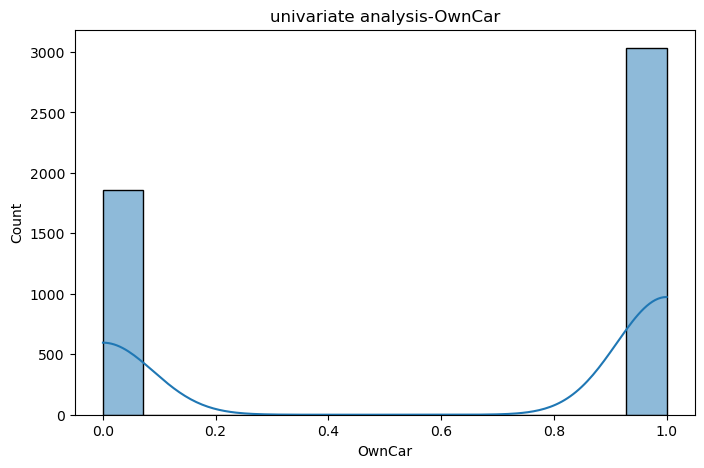

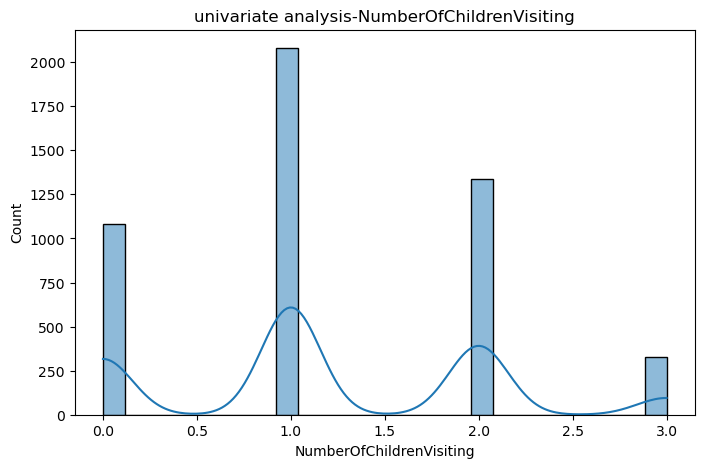

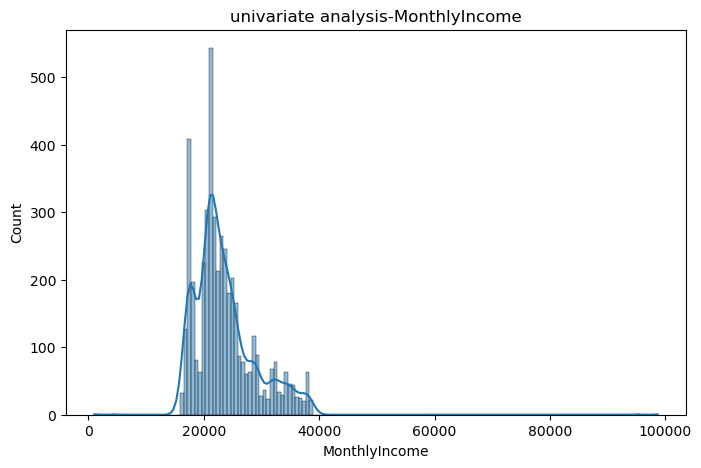

In [30]:
for column in num_col:
    plt.figure(figsize=(8,5))
    sns.histplot(df[column],kde=True)
    plt.title(f'univariate analysis-{column}')
    plt.show()

In [33]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [35]:
for i in df[cat_col].columns:
    x= df[i].unique()
    print(f'{i}:{x}')
    print()

TypeofContact:['Self Enquiry' 'Company Invited' nan]

Occupation:['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender:['Female' 'Male']

ProductPitched:['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus:['Single' 'Divorced' 'Married' 'Unmarried']

Designation:['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



<Axes: xlabel='Age', ylabel='DurationOfPitch'>

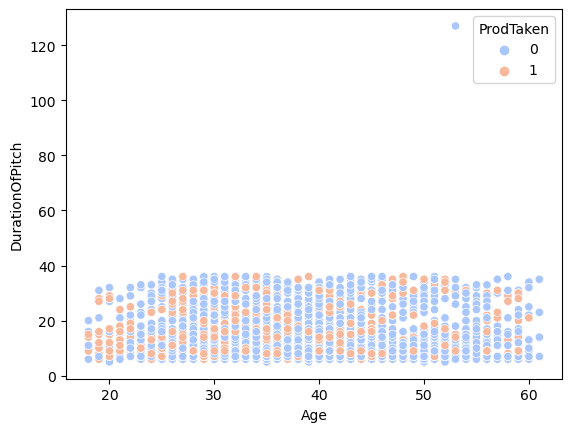

In [39]:
sns.scatterplot(x='Age',y='DurationOfPitch',data=df,hue='ProdTaken',palette='coolwarm')

In [40]:
cross_tab = pd.crosstab(df['MaritalStatus'],df['ProdTaken'],normalize='index')
cross_tab

ProdTaken,0,1
MaritalStatus,,
Divorced,0.869474,0.130526
Married,0.860684,0.139316
Single,0.668122,0.331878
Unmarried,0.756598,0.243402


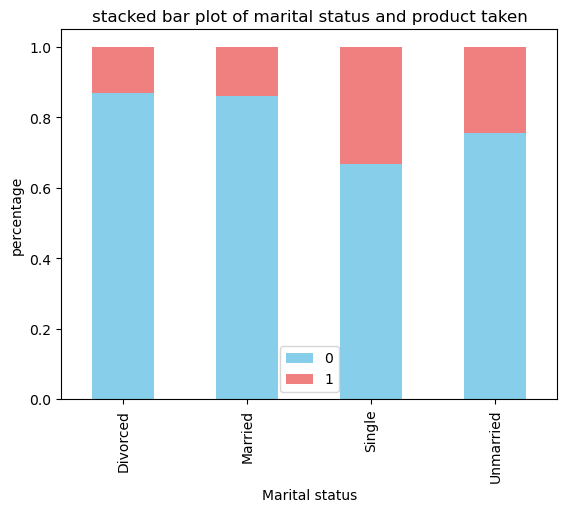

In [43]:
cross_tab.plot(kind='bar',stacked=True,color=['skyblue','lightcoral'])
plt.title('stacked bar plot of marital status and product taken')
plt.xlabel('Marital status')
plt.ylabel('percentage')
plt.legend()
plt.show()

In [46]:
df.Gender.value_counts(normalize=True)

Gender
Male      0.596563
Female    0.403437
Name: proportion, dtype: float64

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

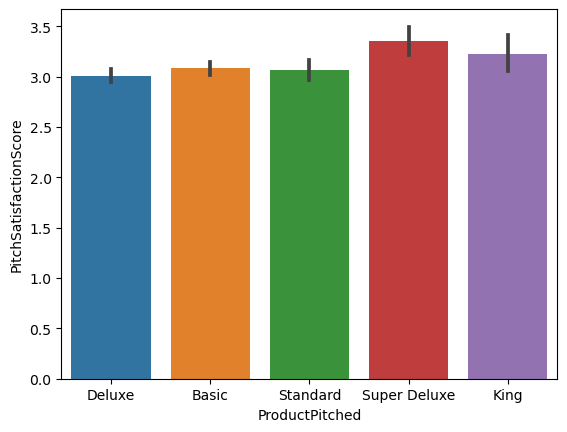

In [48]:
sns.barplot(x='ProductPitched',y='PitchSatisfactionScore',data=df)

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

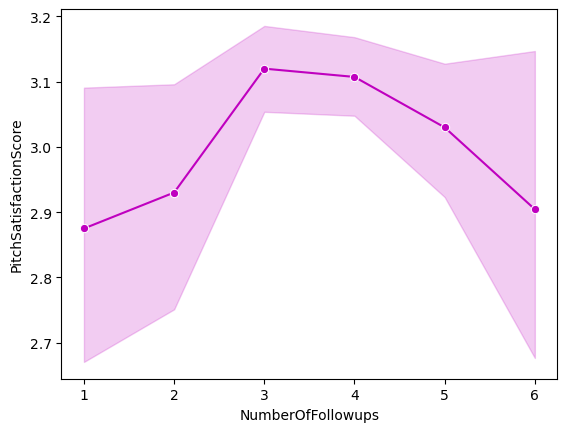

In [54]:
sns.lineplot(x='NumberOfFollowups',y='PitchSatisfactionScore',data=df,marker='o',color='m')

In [56]:
#multivariate analysis


<Axes: xlabel='ProdTaken', ylabel='Age'>

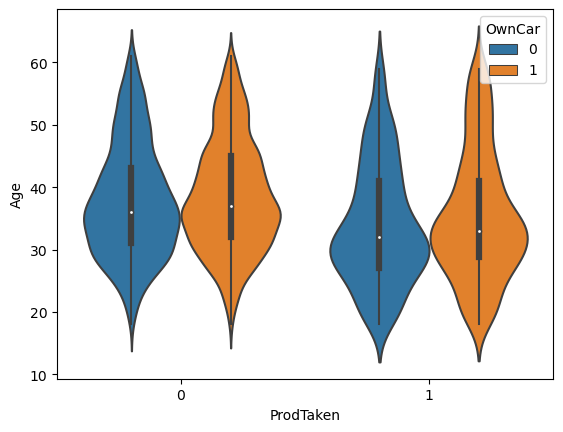

In [59]:
sns.violinplot(x='ProdTaken',y='Age',data=df,hue='OwnCar')

<Axes: xlabel='Gender', ylabel='Age'>

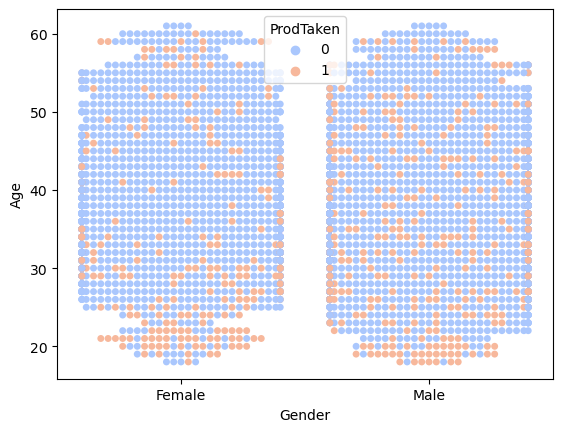

In [61]:
sns.swarmplot(x='Gender',y='Age',data=df,hue='ProdTaken',palette='coolwarm')

In [62]:
num_col

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

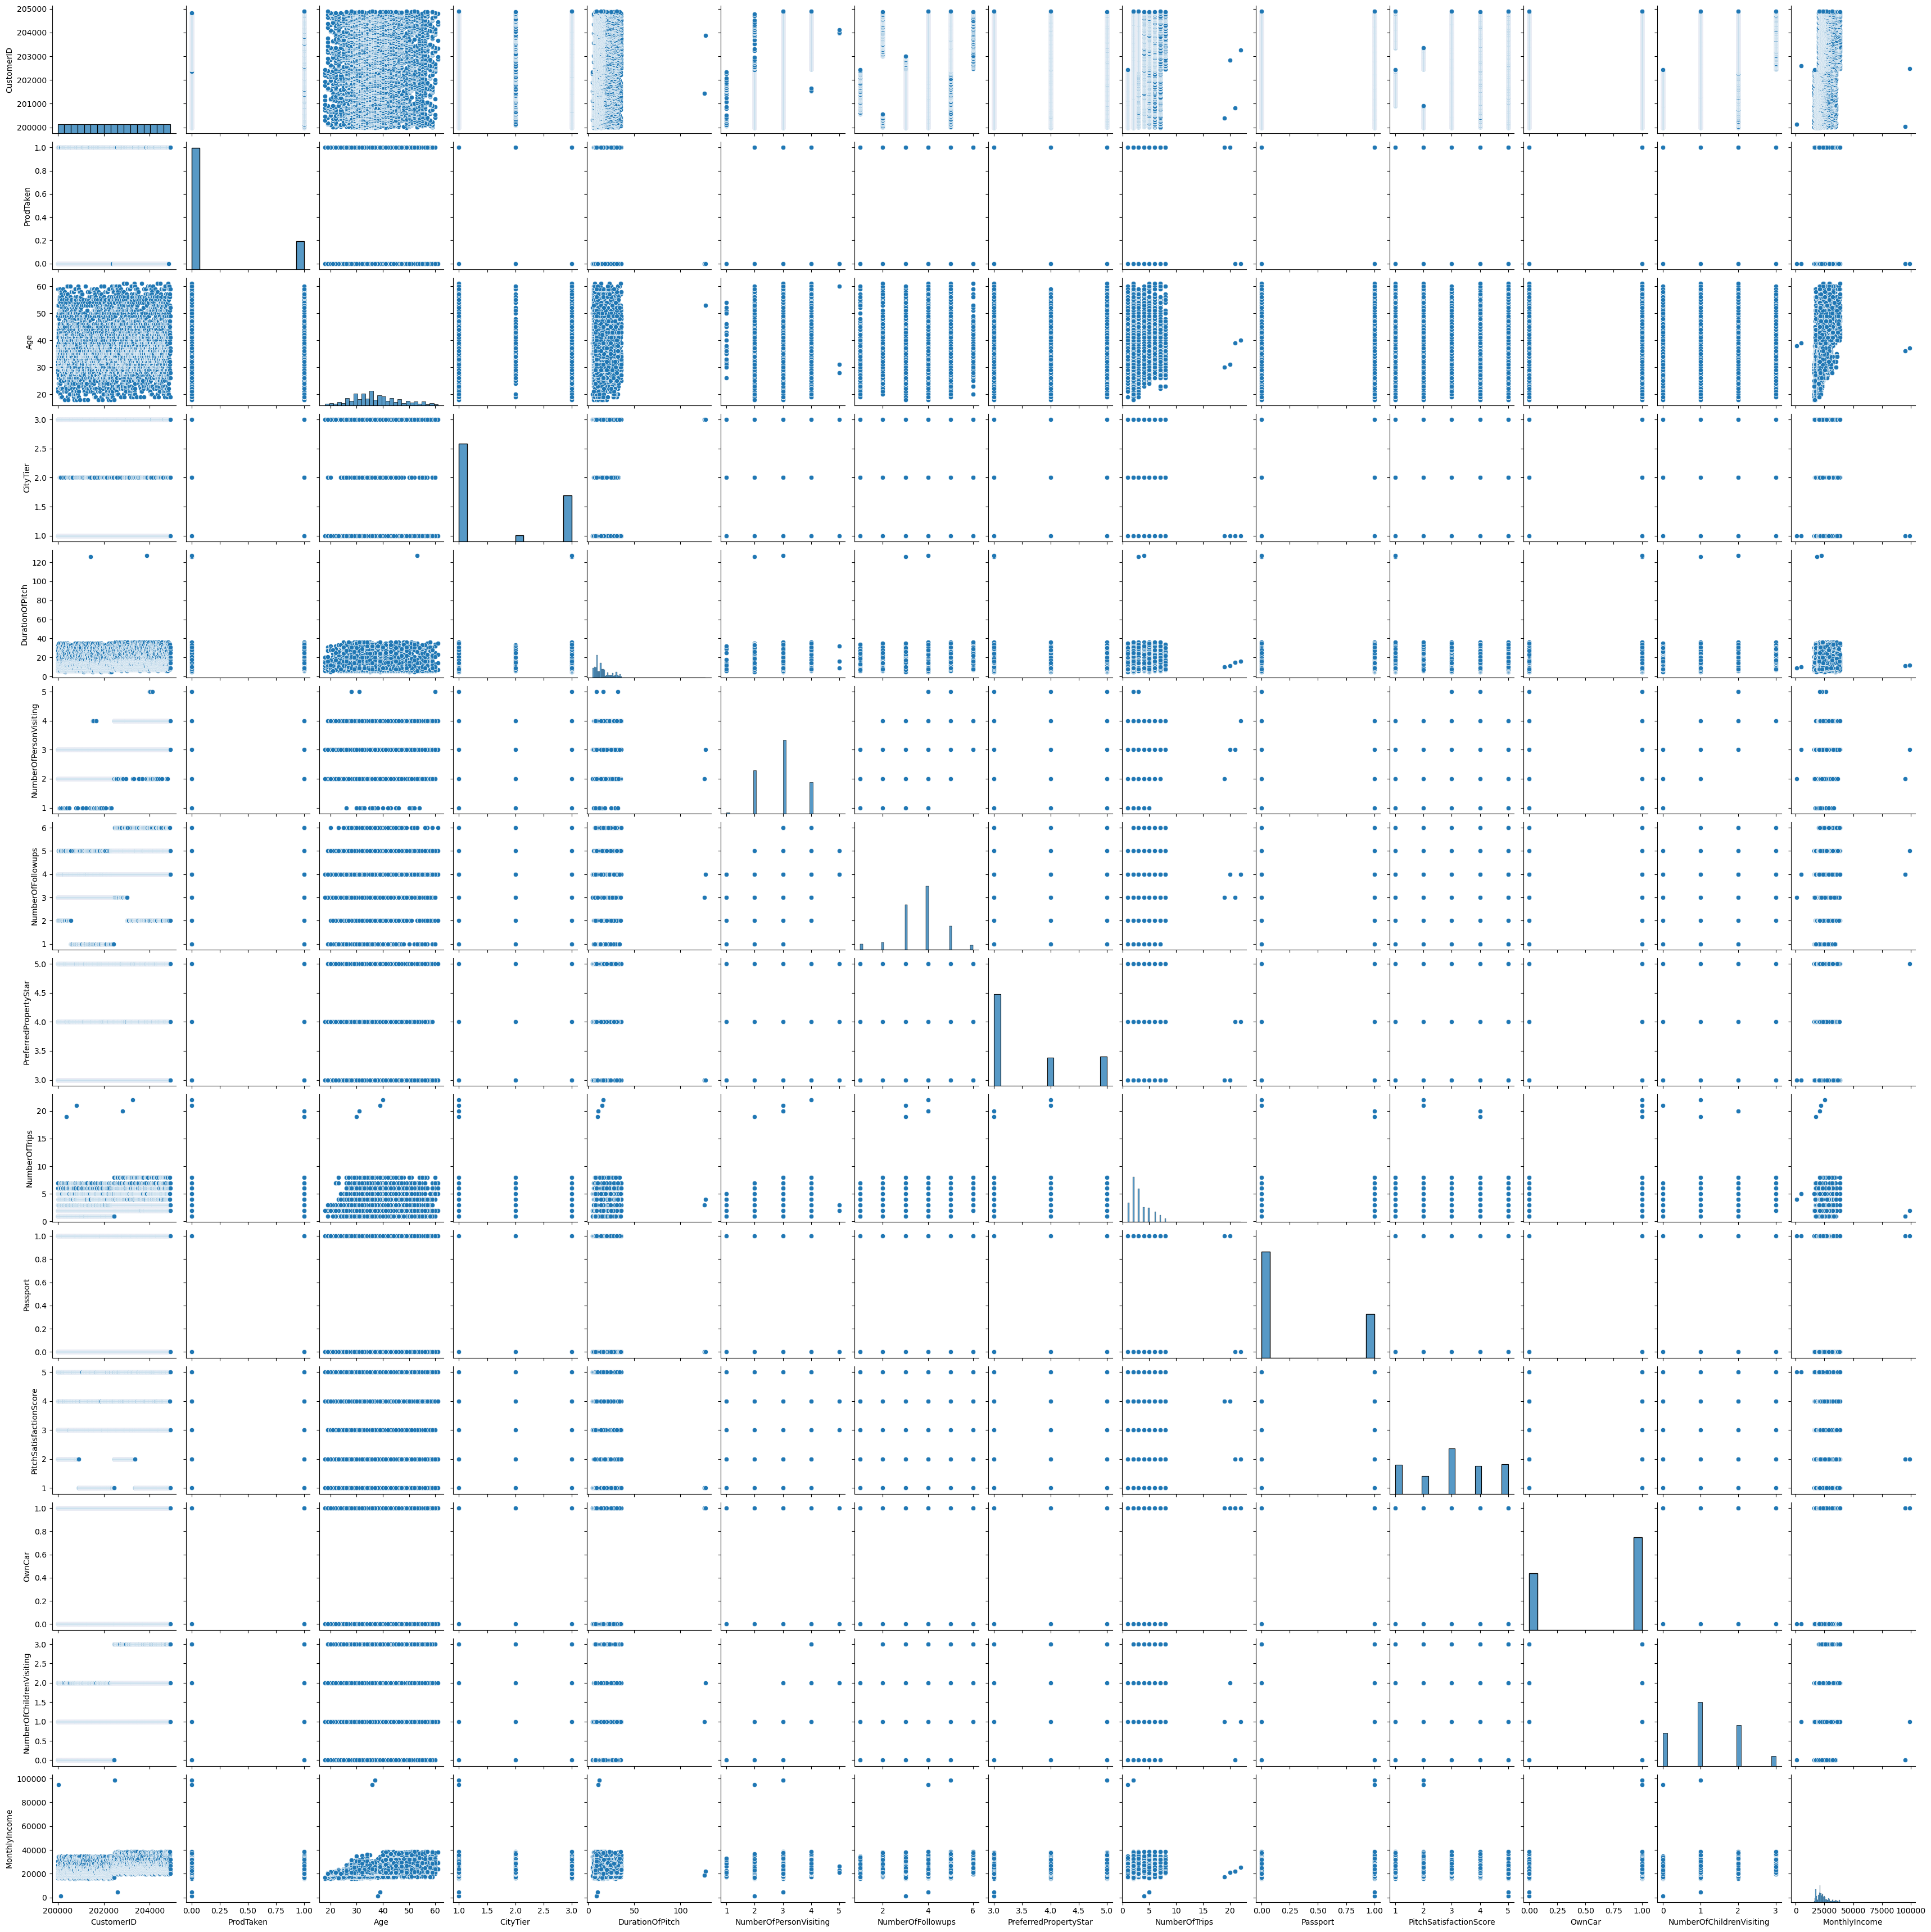

In [63]:
sns.pairplot(df[num_col])

In [66]:
corr_df = df[num_col].corr()
corr_df

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


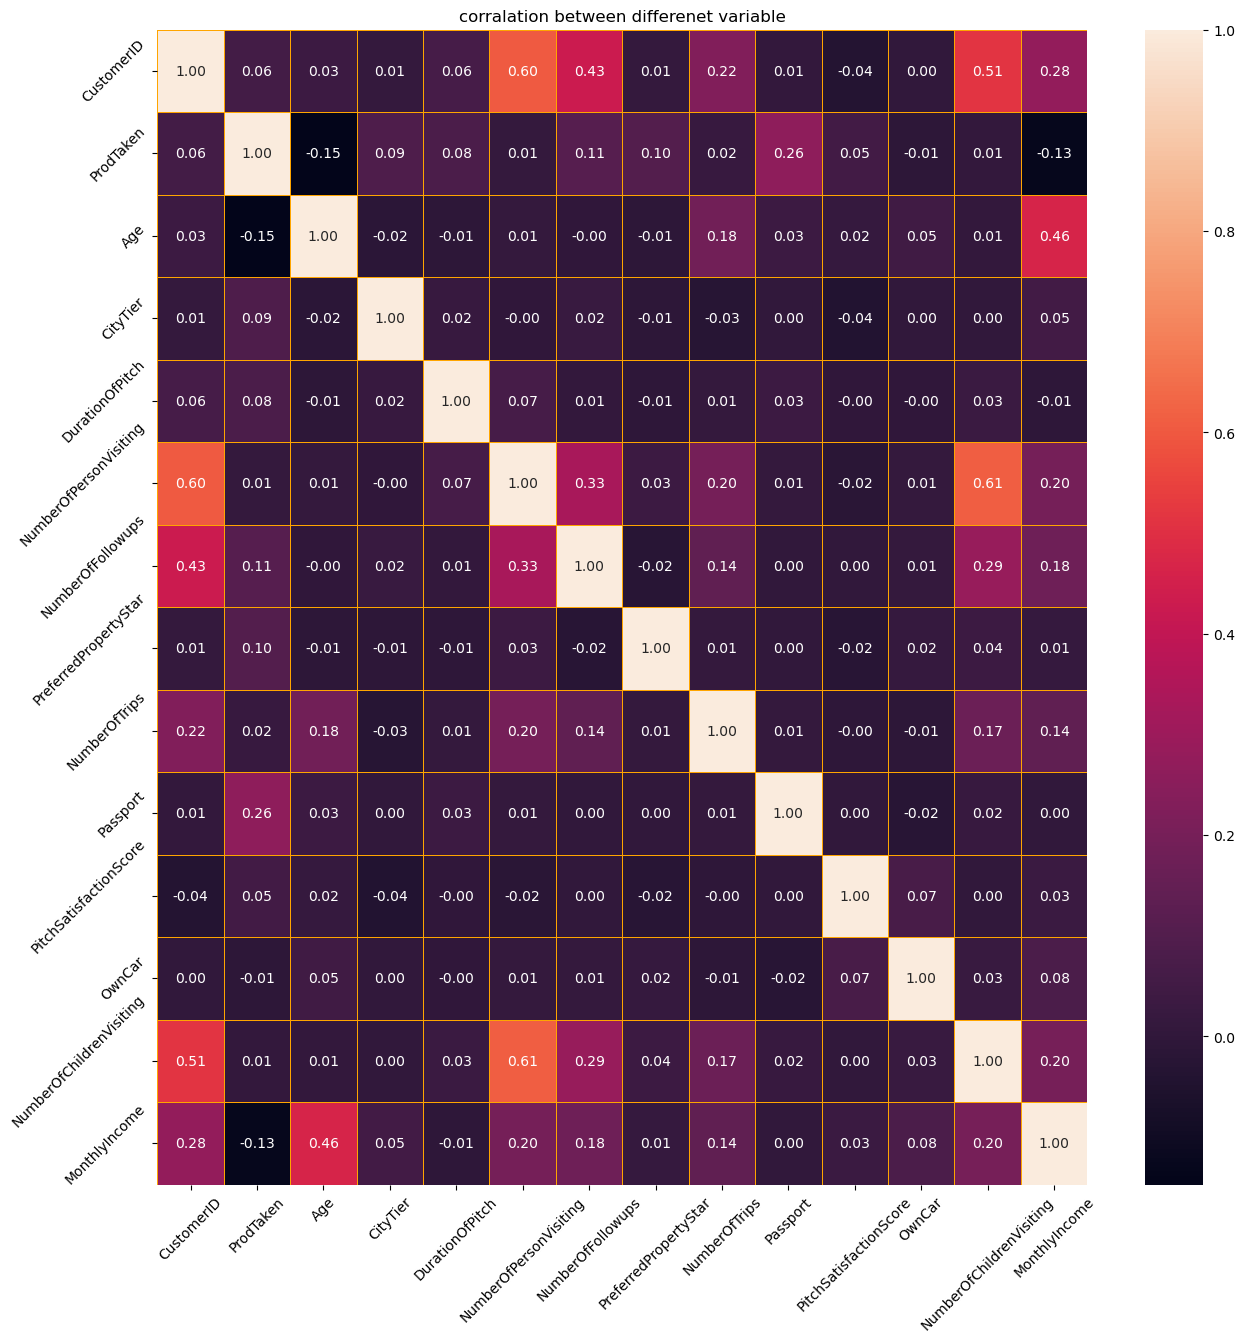

In [68]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr_df,annot=True,fmt='.2f',ax=ax,linewidths=0.5,linecolor='orange')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('corralation between differenet variable')
plt.show()

In [69]:
from mpl_toolkits.mplot3d import Axes3D

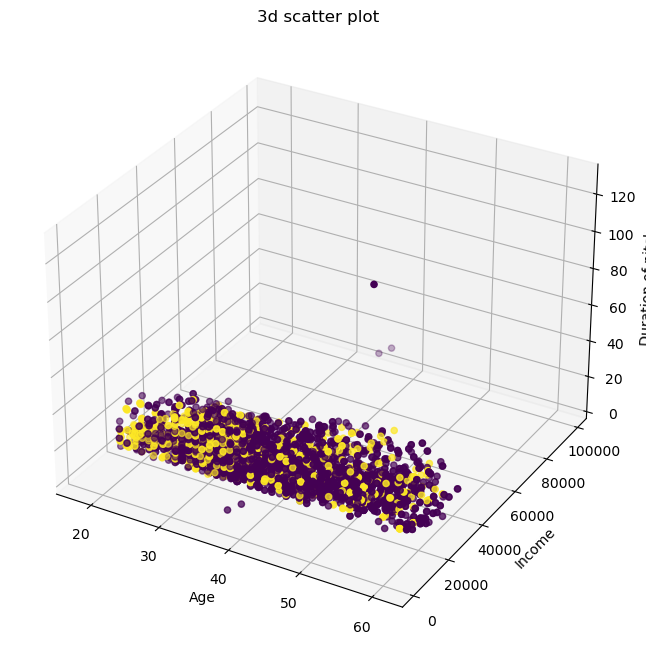

In [72]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['Age'],df['MonthlyIncome'],df['DurationOfPitch'],c=df['ProdTaken'],cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Duration of pitch')
ax.set_title('3d scatter plot')
plt.show()